In [1]:
import matplotlib.pyplot as plt
import numpy as np

Find the minimization of $f(x) = x^4 + x^3 - x^2 - x$

In [9]:
def f(x):
    return x**4+x**3-x**2-x

def f_dot(x):
    return 4*x**3+3*x**2-2*x-1

def f_double_dot(x):
    return 12*x**2 + 6*x - 2

Use newton to find the root of $f(x)$

In [25]:
def newton(x0, tol, max_iter):
    x = x0
    for i in range(max_iter):
        x = x - f(x)/f_dot(x)
        if abs(f(x)) < tol:
            plt.plot(x, f(x), 'rx')
            return x
        else:
            plt.plot(x, f(x), 'bx')
    return x

3.3357676166478995e-15


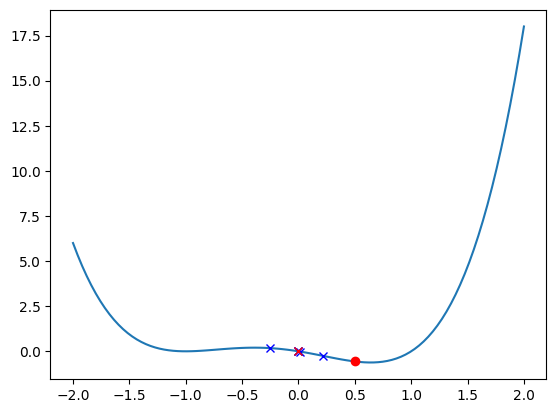

In [26]:
plt.plot(np.linspace(-2,2,100), f(np.linspace(-2,2,100)))
init_x = 0.5
plt.plot(init_x, f(init_x), 'ro')
zero = newton(init_x, 1e-10, 100)
print(zero)

Use newton to find the minimum of $f(x)$。 The minimum of $f(x)$ is the root of $f'(x)$

In [30]:
def seconde_newton(x0, tol, max_iter):
    x = x0
    for i in range(max_iter):
        x = x - f_dot(x) / f_double_dot(x)
        if abs(f_dot(x)) < tol:
            plt.plot(x, f(x), 'rx')
            return x
        else :
            plt.plot(x, f(x), 'bx')
    return x

0.6403882032024044


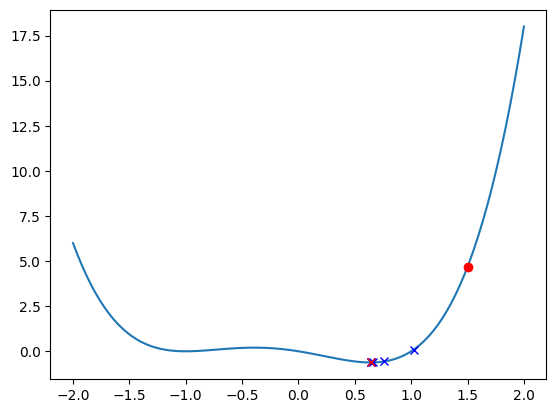

In [31]:
plt.plot(np.linspace(-2,2,100), f(np.linspace(-2,2,100)))
init_x = 1.5
plt.plot(init_x, f(init_x), 'ro')
x_opt = seconde_newton(init_x, 1e-10, 100)
print(x_opt)

-0.3903882032022074


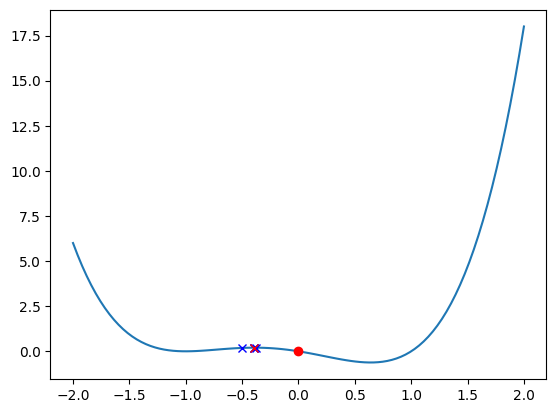

In [32]:
plt.plot(np.linspace(-2,2,100), f(np.linspace(-2,2,100)))
init_x = 0
plt.plot(init_x, f(init_x), 'ro')
x_opt = seconde_newton(init_x, 1e-10, 100)
print(x_opt)

To avoid newton find the maximum of $f(x)$, we should regulate the newton step to make sure gradient descent.

In [42]:
def seconde_newton_descent(x0, beta, tol, max_iter):
    x = x0
    for i in range(max_iter):
        gradient = f_dot(x)
        hessian = f_double_dot(x)
        while hessian <= 0:
            hessian += beta
        x = x - gradient / hessian

        if abs(gradient) < tol:
            plt.plot(x, f(x), 'rx')
            return x
        else :
            plt.plot(x, f(x), 'bx')
    return x

0.6403882032022076


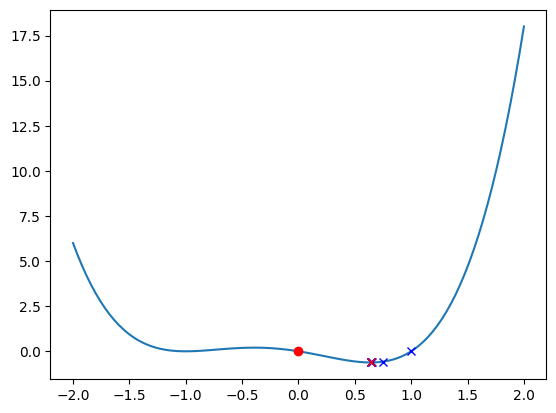

In [43]:
plt.plot(np.linspace(-2,2,100), f(np.linspace(-2,2,100)))
init_x = 0
plt.plot(init_x, f(init_x), 'ro')
x_opt = seconde_newton_descent(init_x, 1, 1e-10, 100)
print(x_opt)

To avoid overshoot, we can use line search.

In [54]:
def seconde_newton_descent_backTracking(x0, beta, tol, max_iter, alpha, p):
    x = x0
    for i in range(max_iter):
        gradient = f_dot(x)
        hessian = f_double_dot(x)
        while hessian <= 0:
            hessian += beta

        dx = - gradient / hessian
        
        t = 1.0  # initial step size
        # backtracking line search
        while f(x + t * dx) > f(x) + alpha * t * gradient * dx:
            t *= p
        
        x = x - t * gradient / hessian

        if abs(gradient) < tol:
            plt.plot(x, f(x), 'rx')
            return x
        else :
            plt.plot(x, f(x), 'bx')
            
    return x

0.6403882032022076


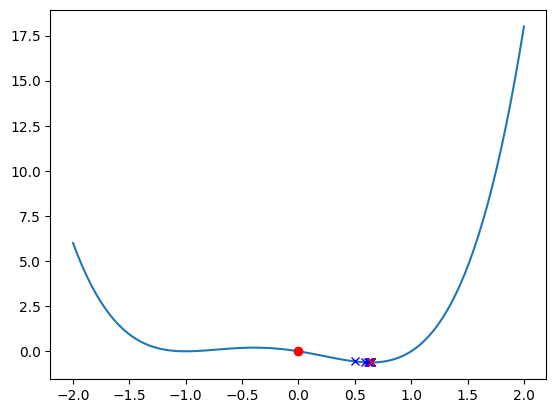

In [55]:
plt.plot(np.linspace(-2,2,100), f(np.linspace(-2,2,100)))
init_x = 0
plt.plot(init_x, f(init_x), 'ro')
x_opt = seconde_newton_descent_backTracking(init_x, 0.5, 1e-10, 100, 0.5, 0.5)
print(x_opt)